In [1]:
## Imports ##

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Constants ##  

q = 1.6e-19 # Culombs
m = 1.67e-27  # kg charge of a particle
dt = 0.000006        # s  time step
steps = 1000000
# the number of steps 

In [3]:
## Initial Conditions ## 

# First array #
r_0 = np.array([0,0,0]) # Distance from source charge to charged partical
v_0 = np.array([100, 0, 0]) # Intial velosity 

# empty arrays #
r = np.zeros((steps, 3))
v = np.zeros((steps, 3))
a = np.zeros((steps, 3))

# First array of r and v #
r[0] = r_0
v[0] = v_0

#Define an E and a B that are in 3 element arrays

B = np.array([0,0,1e-7])

E = np.array([0,0,0])

In [4]:
def lawrence_force(q, v, B, E, mass):
    # Compute the Lawrence force
    F = q * (E + np.cross(v, B))

    # Compute acceleration using F = ma
    a = F / mass

    return a

def euler_step(r, v, B, E, mass, q, dt):
    # Compute the Lawrence force and acceleration
    a = lawrence_force(q, v, B, E, mass)

    # Update velocity using the computed acceleration
    v_new = v + a * dt

    # Update position using the updated velocity
    r_new = r + v * dt

    return r_new, v_new

In [5]:
def simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E):
    """
    Simulate the trajectory of a charged particle in an electromagnetic and/or magnetic field using Euler's method.

    Inputs:
     q: Charge of the particle (Coulombs)
     m: Mass of the particle (kg)
     dt: Time step (s)
     steps: Number of simulation steps
     r_0: Initial position as a 3D array [x, y, z]
     v_0: Initial velocity as a 3D array [vx, vy, vz]
     B: Magnetic field as a 3D array [Bx, By, Bz]
     E: Electric field as a 3D array [Ex, Ey, Ez]

    Outputs:
     r: Array of particle positions over time (shape: (steps, 3))
     v: Array of particle velocities over time (shape: (steps, 3))
    """

    # Initialize arrays for position, velocity, and acceleration
    r = np.zeros((steps, 3))
    v = np.zeros((steps, 3))

    # Set initial conditions
    r[0] = r_0
    v[0] = v_0

    # Simulation loop
    for step in range(1, steps):
        r[step], v[step] = euler_step(r[step-1], v[step-1], B, E, m, q, dt)
    print(v)

    return r, v

[[ 1.00000000e+02  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+02 -5.74850299e-03  0.00000000e+00]
 [ 9.99999997e+01 -1.14970060e-02  0.00000000e+00]
 ...
 [ 5.93841179e+01 -8.06636621e+01  0.00000000e+00]
 [ 5.93794809e+01 -8.06670758e+01  0.00000000e+00]
 [ 5.93748438e+01 -8.06704893e+01  0.00000000e+00]]


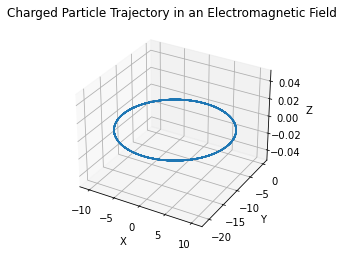

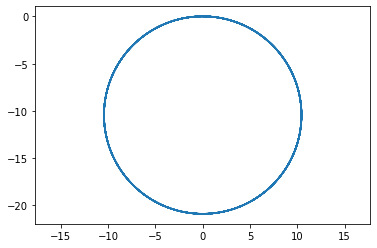

In [6]:
# Run simulation
particle_trajectory, particle_velocities = simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E)


# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(particle_trajectory[:, 0], particle_trajectory[:, 1], particle_trajectory[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charged Particle Trajectory in an Electromagnetic Field')
plt.show()

plt.plot(particle_trajectory[:, 0], particle_trajectory[:, 1])
plt.axis('equal')
plt.show()

#plt.plot(ke)
#plt.show()

[[ 1.00000000e+02  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+02 -5.74850299e-03  0.00000000e+00]
 [ 9.99999997e+01 -1.14970060e-02  0.00000000e+00]
 ...
 [ 5.93841179e+01 -8.06636621e+01  0.00000000e+00]
 [ 5.93794809e+01 -8.06670758e+01  0.00000000e+00]
 [ 5.93748438e+01 -8.06704893e+01  0.00000000e+00]]
(1000000,)


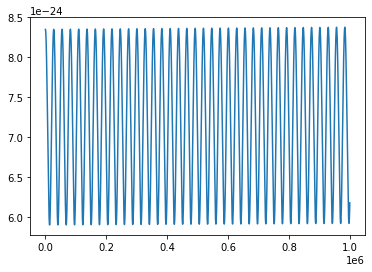

In [7]:
# Kinetic Energy 
ke = 0.5*m*(particle_velocities**2)
print(particle_velocities)
ke_mag = np.sqrt((ke[:,0]**2)+(ke[:,1]**2)+(ke[:,2]**2))
print(np.shape(ke_mag))
plt.plot(ke_mag)

## Runge-Kutta 4th-Order Method

In [9]:
## Constants ##  

q = 1.6e-19 # Culombs
m = 1.67e-27  # kg charge of a particle
dt = 0.006        # s  time step
steps = 1000
# the number of steps 

In [13]:
def runge_kutta_step(r, v, B, E, mass, q, dt):
    # Runge-Kutta coefficients
    k1 = dt * lawrence_force(q, v, B, E, mass) # The first time step
    k2 = dt * lawrence_force(q, v + 0.5 * k1, B, E, mass) # Half way through the time step
    k3 = dt * lawrence_force(q, v + 0.5 * k2, B, E, mass) #Half way through the next time step 
    k4 = dt * lawrence_force(q, v + k3, B, E, mass) # After one full time step 

    # Update velocity using the weighted average of the four estimates
    v_new = v + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

    # Update position using the updated velocity
    r_new = r + v_new * dt

    return r_new, v_new


def simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E):
    """
    Simulate the trajectory of a charged particle in an electromagnetic and/or magnetic field using the Runge-Kutta method.

    Inputs:
     q: Charge of the particle (Coulombs)
     m: Mass of the particle (kg)
     dt: Time step (s)
     steps: Number of simulation steps
     r_0: Initial position as a 3D array [x, y, z]
     v_0: Initial velocity as a 3D array [vx, vy, vz]
     B: Magnetic field as a 3D array [Bx, By, Bz]
     E: Electric field as a 3D array [Ex, Ey, Ez]

    Outputs:
     r: Array of particle positions over time (shape: (steps, 3))
     v: Array of particle velocities over time (shape: (steps, 3))
    """

    # Initialize arrays for position and velocity
    r = np.zeros((steps, 3))
    v = np.zeros((steps, 3))

    # Set initial conditions
    r[0] = r_0
    v[0] = v_0

    # Simulation loop
    for step in range(1, steps):
        r[step], v[step] = runge_kutta_step(r[step - 1], v[step - 1], B, E, m, q, dt)

    return r, v

[[100.           0.           0.        ]
 [ 99.83481907  -5.74533698   0.        ]
 [ 99.33982201 -11.47169355   0.        ]
 ...
 [ 72.21422332 -69.17442414   0.        ]
 [ 68.12063542 -73.20911166   0.        ]
 [ 63.80200295 -77.00194422   0.        ]]


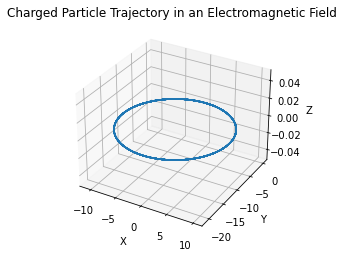

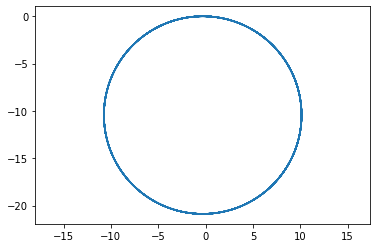

In [14]:
# Example
r_result, v_result = simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E)
print(v_result)

# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r_result[:, 0], r_result[:, 1], r_result[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charged Particle Trajectory in an Electromagnetic Field')
plt.show()

plt.plot(r_result[:, 0], r_result[:, 1])
plt.axis('equal')
plt.show()


[[100.           0.           0.        ]
 [ 99.83481907  -5.74533698   0.        ]
 [ 99.33982201 -11.47169355   0.        ]
 ...
 [ 72.21422332 -69.17442414   0.        ]
 [ 68.12063542 -73.20911166   0.        ]
 [ 63.80200295 -77.00194422   0.        ]]
(1000,)


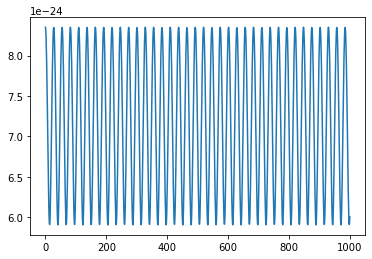

In [12]:
# Kinetic Energy 
ke = 0.5*m*(v_result**2)
print(v_result)
ke_mag = np.sqrt((ke[:,0]**2)+(ke[:,1]**2)+(ke[:,2]**2))
print(np.shape(ke_mag))
plt.plot(ke_mag)